In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
import agentpy as ap

In [44]:
class square_forest:
	# ideally evolves till full destruction, but we set a hard limit on time

	def __init__(self):
		self.dim = 0 
		self.cells = np.zeros((self.dim, self.dim))

	def set_dim(self):
		self.dim = int(input("\nEnter dimension of your square forest: "))
	
	def init_cells(self):
		# random init with some number of trees; upper limit = dim * dim
		n_max = np.random.randint(self.dim * self.dim) 

		loc_trees = set()
		for i in range(n_max):
			coords = tuple(np.random.randint(self.dim, size=2))
			loc_trees.add(coords)
			
		
		for tree in loc_trees:
			self.cells[tree[0], tree[1]] = 1

In [45]:
def init_forest(dim):	
	"""Create a forest as a grid of dim x dim size. 
    
    Input:
    dim (int): dimension of the forest grid.
    
    Output:
    dim x dim forest grid with randomly planted trees."""
    
	forest = np.zeros((dim, dim))
	n_trees = np.random.randint(dim * dim)

	loc_trees = set()
	for i in range(n_trees):
		coords = np.random.randint(dim, size=2)
		loc_trees.add(tuple(coords))
		
	
	for tree in loc_trees:
		forest[tree[0], tree[1]] = 1

	print("\n Here is the initial forest config:\n", forest)
	return forest

In [57]:
dim = 40
forest = init_forest(dim)


 Here is the initial forest config:
 [[1. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 1.]]


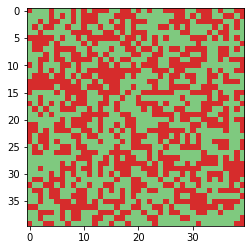

In [58]:
fig, ax = plt.subplots()
color_dict = {0:'#7FC97F', 1:'#d62c2c', 2:'#e5e5e5', None:'#d5e5d5'}
ap.gridplot(forest, ax=ax, color_dict=color_dict, convert=True)


In [48]:
# tree density
np.count_nonzero(forest == 1) / (dim*dim)

0.2648

In [49]:
def get_valid_neighbours(cell, forest, dim):
	print("\nEntered get_valid_neighbours()")
	
	row, col = cell[0], cell[1]
	if row < 0 : 
		raise Exception("negative row index encountered")

	elif col < 0 : 
		raise Exception("negative column index encountered")

	elif row >= dim : 
		raise Exception("row index out of dimension bounds")

	elif col >= dim : 
		raise Exception("column index out of dimension bounds")

	else:

		neighbours = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]
		print("\n -- adjacent cells indices are: ", neighbours)


		for i, (r, c) in enumerate(neighbours):
			if r < 0 or c < 0 or r == dim or c == dim:
				neighbours[i] = None
			elif forest[r, c] != 1 :
				neighbours[i] = None

		print("\n -- after None-ifying non tree cells and invalid edge cases: ", neighbours)

		valid_neighbours = []
		for n in neighbours:
			if n != None:
				valid_neighbours.append(n)

		print("\n Final valid list: ", valid_neighbours)
		return valid_neighbours

In [50]:
def pick_fire_location(dim):
	return np.random.randint(dim, size=2)


In [51]:
def spread_to(valid_neighbours, forest, dim, burnt):

	print("\n---------------------------\nThe next degree neighbours are at: ", valid_neighbours)
	
	# now we burn all of them:
	for (row, col) in valid_neighbours:
		# decimate: first set to 2
		forest[row, col] = 2
		burnt.append((row, col))
	print("\n incendio \n", forest)

	# spread to second degree neighbours
	for cell in valid_neighbours:
		next_neighbours = get_valid_neighbours(cell, forest, dim)
		if len(next_neighbours) != 0: # i.e has somewhere to spread to
			spread_to(next_neighbours, forest, dim, burnt)

	print("\n----------DONE RECURSING---------")

In [41]:
def simulate_one_fire(dim):
	forest = init_forest(dim)
	fire_at = pick_fire_location(dim)
	burnt = []

	# 0 means empty cell, 1 means cell has a tree
	forest[fire_at[0], fire_at[1]] = 2 
	print(f"\n fire started at {fire_at}: \n", forest)
	burnt.append(fire_at)	

	# start and spread
	neighbours = get_valid_neighbours(fire_at, forest, dim)
	spread_to(neighbours, forest, dim, burnt)

	# go to all burnt sites and set them to 0 at the end of one spread.
	for (r, c) in burnt:
		forest[r, c] = 0

	print("\n After the damage:\n ", forest)

In [52]:
simulate_one_fire(50)


 Here is the initial forest config:
 [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 1.]]

 fire started at [49  9]: 
 [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 1.]]

Entered get_valid_neighbours()

 -- adjacent cells indices are:  [(48, 9), (50, 9), (49, 8), (49, 10)]

 -- after None-ifying non tree cells and invalid edge cases:  [None, None, None, (49, 10)]

 Final valid list:  [(49, 10)]

---------------------------
The next degree neighbours are at:  [(49, 10)]

 incendio 
 [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 1.]]

Entered get_valid_neighbours()

 -- adjacent cells indices are:  [(48, 10), (50, 10), (49, 9), (49, 11)]

 -- after None-ifying non tree cells and 